In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
import os
# Assume 'image_paths' is the list of your 13435 image file paths
sns.set_style('darkgrid')

%matplotlib inline

C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\test\labels\d0585_png.rf.e856034da5220c2380332d5cc60a5982.txt
1573
1573


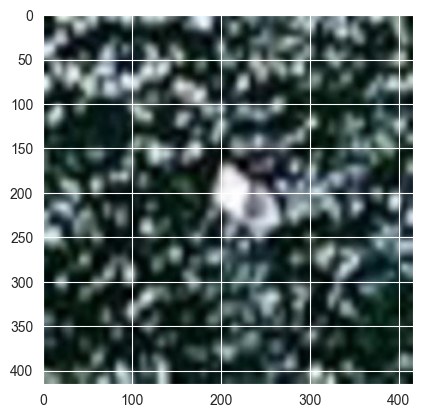

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path 
path = Path(r"C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\test") 
test_images = [] 
test_labels = [] 
i = 0 
for subfolder in path.iterdir(): 
    if subfolder.is_dir():
        for file in subfolder.iterdir():
            if file.suffix.lower() in ['.jpg', '.jpeg', '.png']:  # Image files
                test_images.append(mpimg.imread(file))
            elif file.suffix.lower() == '.txt':  # Label files
                test_labels.append(file)

plt.imshow(test_images[300]) 
print(test_labels[300]) 
print(len(test_labels)) 
print(len(test_images)) 

In [4]:

#model = YOLO("yolo11n.yaml")  # build a new model from YAML
#model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights
#results = model.train(data=r"C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\data.yaml", epochs=100, imgsz=768)

Transferred 499/499 items from pretrained weights


In [14]:
metrics = model.val(conf = 0.25, split = 'test')


Ultralytics 8.3.209  Python-3.12.0 torch-2.8.0+cpu CPU (AMD Ryzen 7 2700 Eight-Core Processor)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 30.123.4 MB/s, size: 13.9 KB)
val: Scanning C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\test\labels... 1573 images, 51 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1573/1573 1.8Kit/s 0.9s0.0s
val: New cache created: C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\test\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 99/99 0.6it/s 2:571.8ss
                   all       1573       2872      0.727      0.443   

In [15]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps 

Ultralytics 8.3.209  Python-3.12.0 torch-2.8.0+cpu CPU (AMD Ryzen 7 2700 Eight-Core Processor)
val: Fast image access  (ping: 0.00.0 ms, read: 28.521.1 MB/s, size: 12.8 KB)
val: Scanning C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\valid\labels.cache... 2165 images, 68 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2165/2165  0.0s
WARNING Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 136/136 0.5it/s 4:171.9ss
                   all       2165       3720      0.583      0.512        0.5      0.305
Speed: 1.4ms preprocess, 107.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to C:\Users\Felhasznalo\Contacts\archive\runs\detect\val2


array([    0.30501])

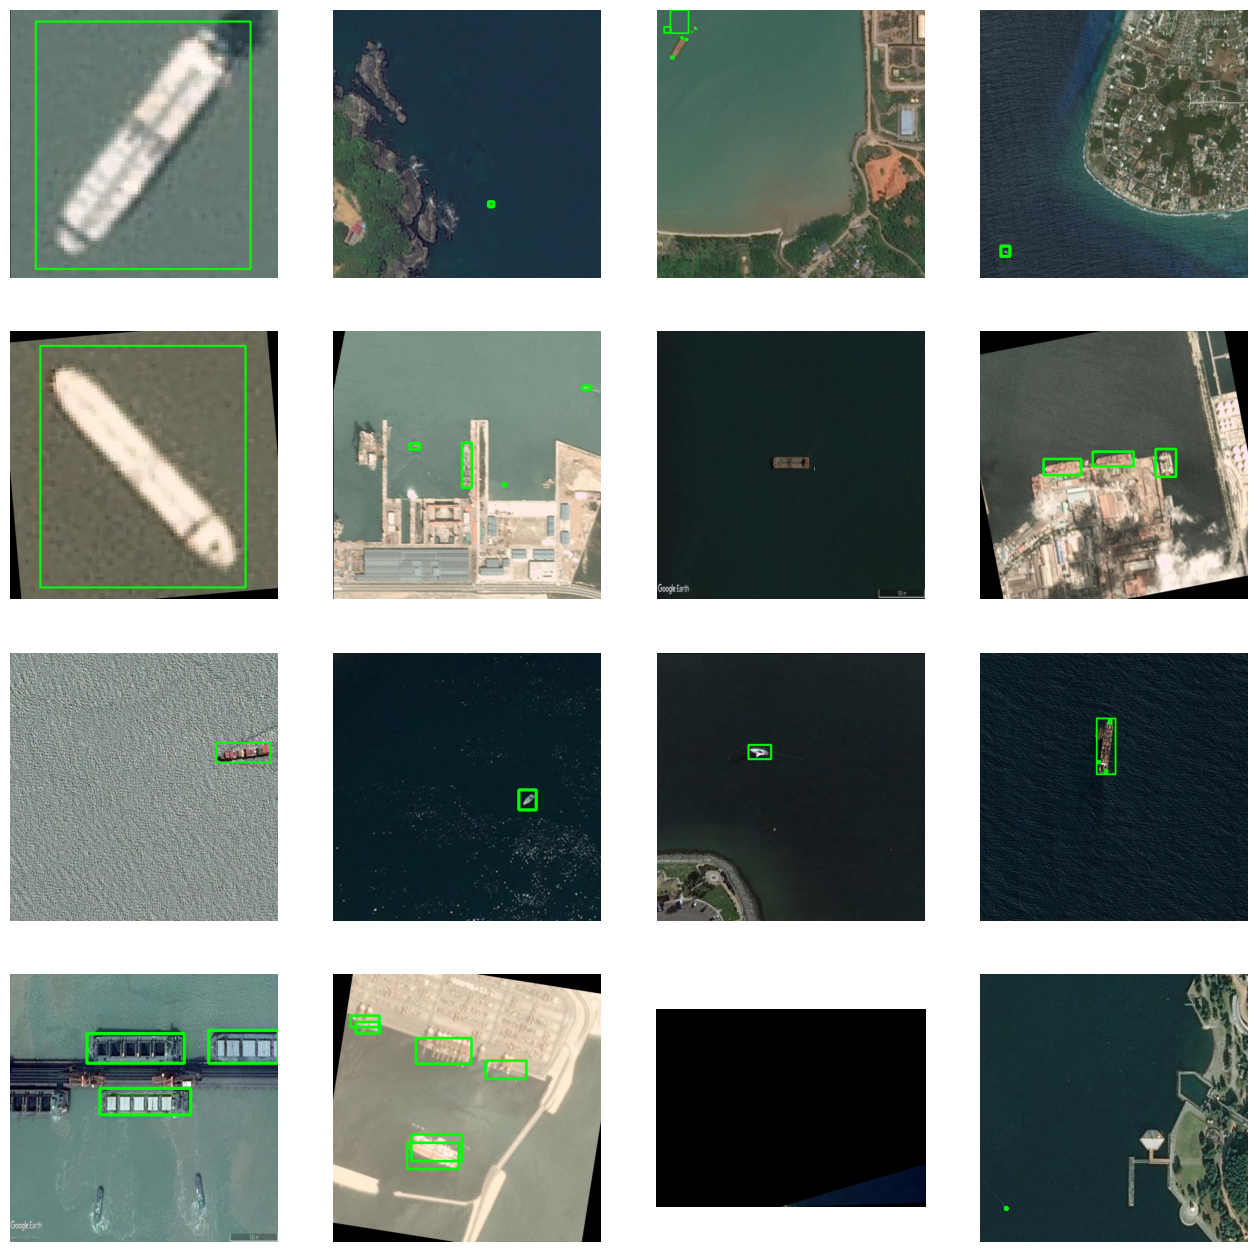

In [4]:
# Define the paths to the images and labels directories
train_images = "C:/Users/Felhasznalo/Contacts/archive/ships-aerial-images/train/images"
train_labels = "C:/Users/Felhasznalo/Contacts/archive/ships-aerial-images/train/labels"

test_images = "C:/Users/Felhasznalo/Contacts/archive/ships-aerial-images/test/images"
test_labels = "C:/Users/Felhasznalo/Contacts/archive/ships-aerial-images/test/labels"

val_images = "C:/Users/Felhasznalo/Contacts/archive/ships-aerial-images/valid/images"
val_labels = "C:/Users/Felhasznalo/Contacts/archive/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [5]:
model=YOLO("C:/Users/Felhasznalo/Contacts/archive/yolo11n.pt")

In [6]:
X = np.random.rand(100, 128) 

# 2. Run K-Means
# Choose the number of clusters (k)
k = 3 

# Initialize the KMeans model
# 'random_state' ensures reproducibility
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Fit the model to the data (runs the algorithm)
kmeans.fit(X)

# 3. Get Results
# cluster_labels will be an array like [0, 1, 2, 0, 1, ...]
# where each number is the cluster index for the corresponding image
cluster_labels = kmeans.labels_ 

# cluster_centers will be the final coordinates of the k centroids
cluster_centers = kmeans.cluster_centers_ 

print(f"Cluster labels for the first 5 images: {cluster_labels[:5]}")
print(f"Shape of the final cluster centers: {cluster_centers.shape}")

Cluster labels for the first 5 images: [2 2 2 2 1]
Shape of the final cluster centers: (3, 128)


In [7]:
import os

# Your main dataset folder (adjust as needed based on your train/val/test split)
DATA_FOLDER = r'C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images'

# Define the lists that will hold your paths
image_paths = []
label_paths = []

# Walk through all subdirectories (train, valid, test)
for root, _, files in os.walk(DATA_FOLDER):
    # Check if we are in an 'images' folder
    if os.path.basename(root) == 'images':
        for filename in files:
            if filename.endswith(('.jpg', '.png', '.jpeg')): # Add your image extensions
                image_path = os.path.join(root, filename)
                image_paths.append(image_path)
                
                # Construct the corresponding label path
                # Assumes labels are in a 'labels' folder parallel to 'images'
                # e.g., '.../train/images/img.jpg' -> '.../train/labels/img.txt'
                
                # 1. Replace 'images' part of the path with 'labels'
                label_root = root.replace(r'\images', r'\labels')
                
                # 2. Change the file extension from .jpg/.png to .txt
                label_filename = os.path.splitext(filename)[0] + '.txt'
                label_path = os.path.join(label_root, label_filename)
                
                # Store the label path
                label_paths.append(label_path)

# Verify the count
print(f"Found {len(image_paths)} images and {len(label_paths)} label files.")
# print(f"First image path: {image_paths[0]}")
# print(f"First label path: {label_paths[0]}")

Found 13435 images and 13435 label files.


In [9]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load a pre-trained model (e.g., ResNet-18)
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# 2. Modify the model to remove the final classification layer (fc)
# The output will be the features from the layer just before 'fc' (the average pooling layer)
# ResNet-18 features will have a dimension of 512
feature_extractor = torch.nn.Sequential(*(list(model.children())[:-1]))

feature_extractor.to(device)
feature_extractor.eval() # Set model to evaluation mode
# Standard ImageNet normalization for pre-trained models
preprocess = transforms.Compose([
    transforms.Resize(256),         # Resize the image
    transforms.CenterCrop(224),     # Crop to the standard input size
    transforms.ToTensor(),          # Convert to a PyTorch tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # ImageNet mean
        std=[0.229, 0.224, 0.225]   # ImageNet standard deviation
    )
])

def extract_features(image_path, model, transform, device):
    """Loads an image, extracts features, and returns a NumPy array."""
    try:
        img = Image.open(image_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)
        
        with torch.no_grad():
            features = model(img_tensor).squeeze()
            
        # Convert the PyTorch tensor to a 1D NumPy array
        return features.cpu().numpy()
        
    except Exception as e:
        print(f"Could not process image {image_path}: {e}")
        return None # Return None for corrupted images
X_list = [] # List to temporarily hold all feature vectors

print("Starting feature extraction...")

# ENSURE this loop processes files in the EXACT SAME order 
# as your original 'image_paths' list.
for i, path in enumerate(image_paths):
    feature_vector = extract_features(path, feature_extractor, preprocess, device)
    
    if feature_vector is not None:
        X_list.append(feature_vector)
    
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1} / {len(image_paths)} images.")

# Convert the list of feature vectors into the final NumPy matrix X
X = np.array(X_list)

print("--- Extraction Complete ---")
print(f"Final feature matrix X shape: {X.shape}") 
# Expected shape: (13435, 512) for ResNet-18
from sklearn.cluster import KMeans
# Let's assume you choose k=5 clusters
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X)

# This array of 13435 labels is the result!
cluster_labels = kmeans.labels_
clustered_images = {i: [] for i in range(k)} # {0: [], 1: [], 2: [], ...}

for i, label in enumerate(cluster_labels):
    # i is the index, which corresponds to the image_paths list
    path = image_paths[i]
    clustered_images[label].append(path)

# Example: Check how many images are in the largest cluster
cluster_sizes = {label: len(paths) for label, paths in clustered_images.items()}
print(cluster_sizes)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Felhasznalo/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100.0%


Starting feature extraction...
Processed 1000 / 13435 images.
Processed 2000 / 13435 images.
Processed 3000 / 13435 images.
Processed 4000 / 13435 images.
Processed 5000 / 13435 images.
Processed 6000 / 13435 images.
Processed 7000 / 13435 images.
Processed 8000 / 13435 images.
Processed 9000 / 13435 images.
Processed 10000 / 13435 images.
Processed 11000 / 13435 images.
Processed 12000 / 13435 images.
Processed 13000 / 13435 images.
--- Extraction Complete ---
Final feature matrix X shape: (13435, 512)
{0: 2866, 1: 3392, 2: 3476, 3: 1494, 4: 2207}


In [10]:
from sklearn.cluster import KMeans
import numpy as np

# --- ASSUME X IS LOADED HERE ---
# X = np.load('features_matrix.npy') # If you saved the file

# 1. Define the number of clusters (k)
k = 5 

# 2. Initialize the KMeans model
# n_init='auto' is the modern standard for initialization
# random_state ensures your results are reproducible
print(f"Starting K-Means clustering with k = {k}...")
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', verbose=1)

# 3. Fit the model to the feature data
# This is the step that performs the clustering
kmeans.fit(X)

# 4. Get the results
# The cluster label for each of the 13435 images
cluster_labels = kmeans.labels_ 

# The coordinates of the 5 final cluster centers
cluster_centers = kmeans.cluster_centers_ 

# --- Output Summary ---
print("\n--- Clustering Complete ---")
print(f"Shape of the final cluster centers: {cluster_centers.shape}")
print(f"First 10 cluster labels: {cluster_labels[:10]}")

# Count and display the size of each cluster (for verification)
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print(f"Cluster sizes: {cluster_sizes}")


Starting K-Means clustering with k = 5...
Initialization complete
Iteration 0, inertia 3521750.75.
Iteration 1, inertia 2117547.0.
Iteration 2, inertia 2054140.25.
Iteration 3, inertia 2035050.375.
Iteration 4, inertia 2029508.25.
Iteration 5, inertia 2027915.0.
Iteration 6, inertia 2027416.875.
Iteration 7, inertia 2027275.625.
Iteration 8, inertia 2027237.375.
Iteration 9, inertia 2027208.5.
Iteration 10, inertia 2027200.875.
Iteration 11, inertia 2027197.25.
Iteration 12, inertia 2027198.125.
Iteration 13, inertia 2027196.875.
Converged at iteration 13: strict convergence.

--- Clustering Complete ---
Shape of the final cluster centers: (5, 512)
First 10 cluster labels: [0 0 0 2 0 2 1 1 1 1]
Cluster sizes: {0: 2866, 1: 3392, 2: 3476, 3: 1494, 4: 2207}


In [4]:
# 1. Import the necessary library
from ultralytics import YOLO

# 2. Define your aggressive hyperparameters for augmentation
# These parameters directly control the geometric and photometric augmentations
aggressive_hypers = {
    # Geometric Augmentation
    'scale': 0.2,       # Aggressive scaling down (allows ships to be 20% of original size)
    'degrees': 15.0,    # Increased rotation (up to +/- 15 degrees)
    'shear': 5.0,       # Increased shear (up to +/- 5 degrees)
    'perspective': 0.0005, # Small perspective change
    
    # Photometric Augmentation (HSV)
    'hsv_h': 0.1,       # Hue adjustment
    'hsv_s': 0.7,       # Aggressive Saturation adjustment (simulates haze/glare)
    'hsv_v': 0.5,       # Aggressive Brightness (Value) adjustment (simulates varied lighting)
    
    # Advanced Augmentation
    'mosaic': 0.8,      # High probability for Mosaic (combines 4 images)
    'mixup': 0.1,       # Probability for MixUp (blends 2 images)
}

In [ ]:
# 3. Load the pre-trained model weights
# Replace 'path/to/best.pt' with your previously trained ship model's weights 
# Or use a foundation model like 'yolov8n.pt' for transfer learning
model = YOLO(r'C:\Users\Felhasznalo\Contacts\archive\yolo11n.pt')

# 4. Start the training session with the new, aggressive augmentations

results = model.train(
    data=r'C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\data.yaml',   # Path to your ship dataset configuration
    epochs=100,                       # Number of epochs to train
    imgsz=640,                        # Image size (e.g., 640)
    batch=-1,                         # Auto-determine batch size based on GPU memory
    **aggressive_hypers,              # Unpack the aggressive augmentation dictionary
    name='ship_detection_aggressive_aug'
)

# Optional: To resume an interrupted training run from 'last.pt'
# results = model.train(
#     model='path/to/your_trained_model/weights/last.pt', # Load the last checkpoint
#     resume=True,
#     **aggressive_hypers,            # The new hyperparams will be applied starting now
# )

Ultralytics 8.3.214  Python-3.12.0 torch-2.8.0+cpu CPU (AMD Ryzen 7 2700 Eight-Core Processor)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Felhasznalo\Contacts\archive\ships-aerial-images\data.yaml, degrees=15.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=C:\Users\Felhasznalo\Contacts\archive\yolo11n.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=ship_detection_aggressive_aug5, nbs=64, nms=False,